In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import shap
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.datasets import make_multilabel_classification
import re

In [2]:
data = pd.read_csv('data_file_csv_final.csv', encoding = 'utf-8')

In [3]:
x=data.loc[: ,['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2']]
y=data['endplus']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# LightGBM 사용

In [4]:
lgb_dtrain = lgb.Dataset(data = x_train, label = y_train)
lgb_dtest = lgb.Dataset(data = x_test, label = y_test)
lgb_param = {
    'learning_rate' : 0.01,
    'objective' : 'regression',
    'verbose' : -1,
    'random_state' : 42
}
lgb_model = lgb.train(
    params = lgb_param, 
    train_set = lgb_dtrain,
    valid_sets=[lgb_dtest]
)
lgb_model_predict = lgb_model.predict(x_test)
print(
    "RMSE : {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))
)

[1]	valid_0's l2: 4012.99
[2]	valid_0's l2: 3990.2
[3]	valid_0's l2: 3967.79
[4]	valid_0's l2: 3945.88
[5]	valid_0's l2: 3924.64
[6]	valid_0's l2: 3903.7
[7]	valid_0's l2: 3883.6
[8]	valid_0's l2: 3863.92
[9]	valid_0's l2: 3844.46
[10]	valid_0's l2: 3825.45
[11]	valid_0's l2: 3806.87
[12]	valid_0's l2: 3787.5
[13]	valid_0's l2: 3769.66
[14]	valid_0's l2: 3750.37
[15]	valid_0's l2: 3733.11
[16]	valid_0's l2: 3715.29
[17]	valid_0's l2: 3698.36
[18]	valid_0's l2: 3681.09
[19]	valid_0's l2: 3664.54
[20]	valid_0's l2: 3647.61
[21]	valid_0's l2: 3632.25
[22]	valid_0's l2: 3616.58
[23]	valid_0's l2: 3601.46
[24]	valid_0's l2: 3585.49
[25]	valid_0's l2: 3570.95
[26]	valid_0's l2: 3555.66
[27]	valid_0's l2: 3541.85
[28]	valid_0's l2: 3527.48
[29]	valid_0's l2: 3513.44
[30]	valid_0's l2: 3500.53
[31]	valid_0's l2: 3486.93
[32]	valid_0's l2: 3474.79
[33]	valid_0's l2: 3462.01
[34]	valid_0's l2: 3449.82
[35]	valid_0's l2: 3438.22
[36]	valid_0's l2: 3427.01
[37]	valid_0's l2: 3415.54
[38]	valid_0's

In [5]:
explainer = shap.TreeExplainer(lgb_model)
expected_value = explainer.expected_value
if isinstance(expected_value, list) :
    expected_value = expected_value[1]
print(f"Explainer expected value : {expected_value}")

Explainer expected value : [7574.74946352]


In [6]:
shap_values = explainer.shap_values(x_test)
shap.initjs()
shap.force_plot(expected_value, shap_values[1, :], x_test.iloc[1, :])

In [7]:
shap.force_plot(explainer.expected_value, shap_values, x_test)

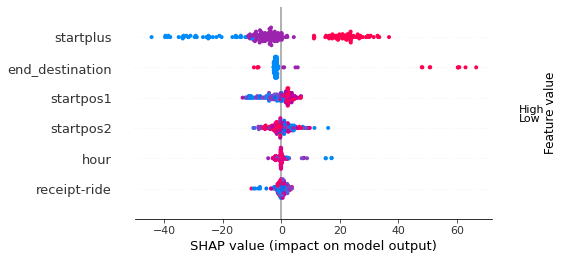

In [8]:
shap.summary_plot(shap_values, x_test)

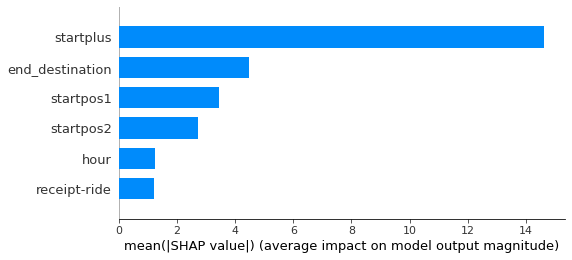

In [9]:
shap.summary_plot(shap_values, x_test, plot_type = 'bar')

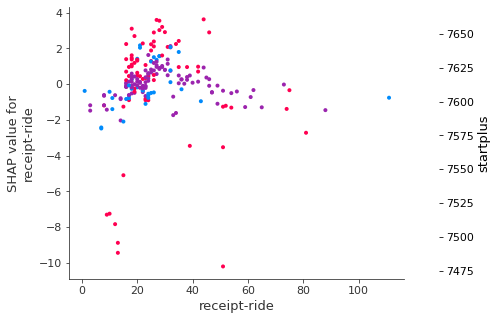

In [10]:
shap.dependence_plot(
    'receipt-ride', 
    shap_values, 
    x_test
)

# XGBoost 사용

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


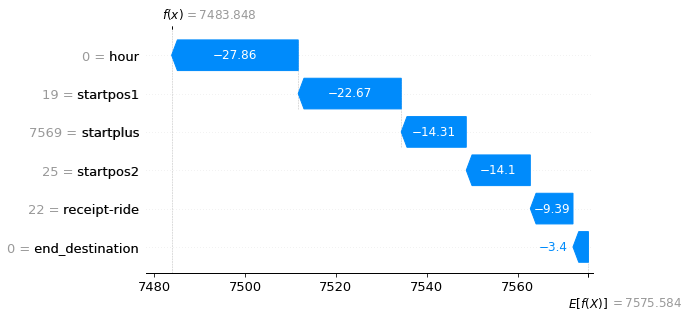

In [11]:
xgbmodel = xgboost.XGBRegressor().fit(x,y)
explainer = shap.Explainer(xgbmodel)
shap_values2 = explainer(x)
shap.plots.waterfall(shap_values2[0])

In [12]:
shap.plots.force(shap_values2[0])

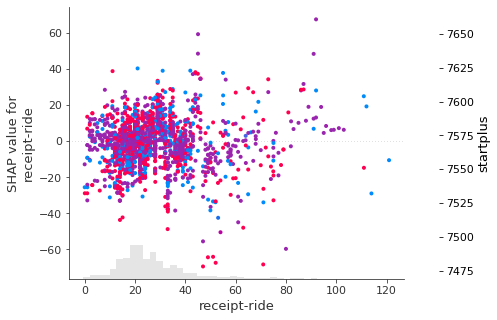

In [13]:
shap.plots.scatter(shap_values2[:, 'receipt-ride'],
                  color = shap_values2)